In [9]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

Se abre el archivo csv:

In [12]:
df_data = pd.read_csv('Data/stock_data.csv')

In [13]:
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,NFLX,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-01-03,NFLX,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-01-04,NFLX,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-01-07,NFLX,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-01-08,NFLX,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.049988,290.529999,284.109985,287.329987,287.329987,3954700
16697,2024-02-08,MCD,286.200012,293.149994,284.200012,291.929993,291.929993,4605000
16698,2024-02-09,MCD,292.149994,292.510010,288.920013,289.470001,289.470001,3322100
16699,2024-02-12,MCD,289.000000,291.190002,288.760010,289.440002,289.440002,2392300


Se limita a 2 números los decimales:

In [15]:
df_data["Open"] = df_data["Open"].round(2)
df_data["High"] = df_data["High"].round(2)
df_data["Low"] = df_data["Low"].round(2)
df_data["Close"] = df_data["Close"].round(2)
df_data["Adj Close"] = df_data["Adj Close"].round(2)

Se ve el tipo de cada columna:

In [16]:
df_data["Volume"].dtype

dtype('int64')

In [17]:
df_data["Date"].dtype

dtype('O')

In [18]:
df_data["Company"].dtype

dtype('O')

In [19]:
df_data["Open"].dtype

dtype('float64')

In [20]:
df_data["High"].dtype

dtype('float64')

In [21]:
df_data["Low"].dtype

dtype('float64')

In [22]:
df_data["Close"].dtype

dtype('float64')

In [23]:
df_data["Adj Close"].dtype

dtype('float64')

Se transforma la columna "Date" de object a Fecha:

In [25]:
df_data["Date"] = pd.to_datetime(df_data["Date"])
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,NFLX,259.28,269.75,256.58,267.66,267.66,11679500
1,2019-01-03,NFLX,270.20,275.79,264.43,271.20,271.20,14969600
2,2019-01-04,NFLX,281.88,297.80,278.54,297.57,297.57,19330100
3,2019-01-07,NFLX,302.10,316.80,301.65,315.34,315.34,18620100
4,2019-01-08,NFLX,319.98,320.59,308.01,320.27,320.27,15359200
...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.05,290.53,284.11,287.33,287.33,3954700
16697,2024-02-08,MCD,286.20,293.15,284.20,291.93,291.93,4605000
16698,2024-02-09,MCD,292.15,292.51,288.92,289.47,289.47,3322100
16699,2024-02-12,MCD,289.00,291.19,288.76,289.44,289.44,2392300


Se agregan columnas para separar día, mes y año:

In [26]:
df_data['Year'] = df_data['Date'].dt.year

In [27]:
df_data['Month'] = df_data['Date'].dt.month

In [28]:
df_data['Day'] = df_data['Date'].dt.day

In [29]:
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2019-01-02,NFLX,259.28,269.75,256.58,267.66,267.66,11679500,2019,1,2
1,2019-01-03,NFLX,270.20,275.79,264.43,271.20,271.20,14969600,2019,1,3
2,2019-01-04,NFLX,281.88,297.80,278.54,297.57,297.57,19330100,2019,1,4
3,2019-01-07,NFLX,302.10,316.80,301.65,315.34,315.34,18620100,2019,1,7
4,2019-01-08,NFLX,319.98,320.59,308.01,320.27,320.27,15359200,2019,1,8
...,...,...,...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.05,290.53,284.11,287.33,287.33,3954700,2024,2,7
16697,2024-02-08,MCD,286.20,293.15,284.20,291.93,291.93,4605000,2024,2,8
16698,2024-02-09,MCD,292.15,292.51,288.92,289.47,289.47,3322100,2024,2,9
16699,2024-02-12,MCD,289.00,291.19,288.76,289.44,289.44,2392300,2024,2,12


Se transforma la columna 'Company' en string:

In [30]:
df_data["Company"] = df_data["Company"].astype(str)

Se realiza un gráfico para ver como cambian los precios de las acciones a lo largo del tiempo:

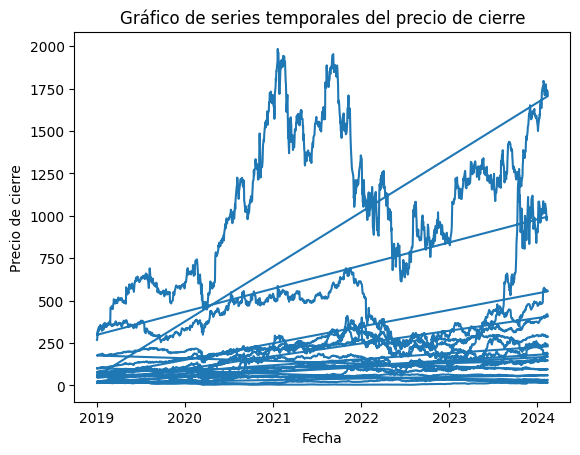

In [32]:
import matplotlib.pyplot as plt

plt.plot(df_data['Date'], df_data['Close'])
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Gráfico de series temporales del precio de cierre')
plt.show()

Se realiza un Histograma del Precio de Cierre. La frecuencia representa el número de observaciones en cada bin. Cada barra del histograma representa un intervalo de precios, es decir bin, y la altura de la barra representa el número de veces que se observaron valores de precio de cierre en ese intervalo:

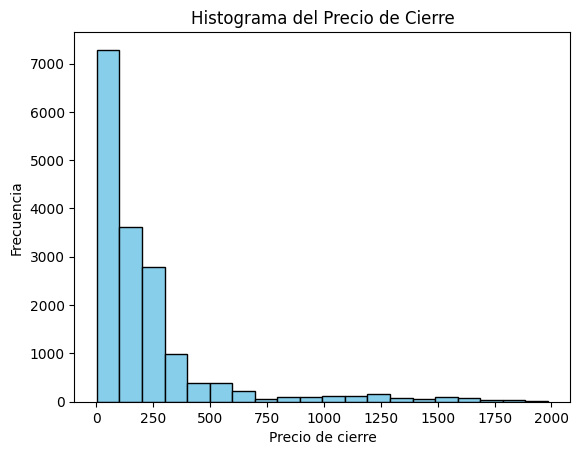

In [33]:
plt.hist(df_data['Close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.title('Histograma del Precio de Cierre')
plt.show()

Se realiza un gráfico para comparar el volumen de operaciones entre diferentes compañías:

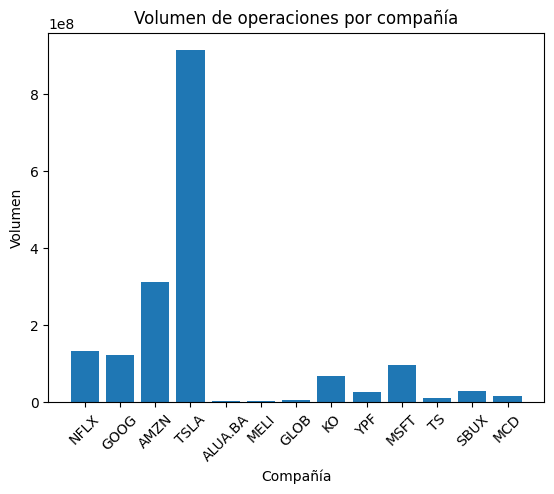

In [34]:
plt.bar(df_data['Company'], df_data['Volume'])
plt.xlabel('Compañía')
plt.ylabel('Volumen')
plt.title('Volumen de operaciones por compañía')
plt.xticks(rotation=45)
plt.show()

Se realiza un gráfico de barras que muestra la diferencia entre el precio de apertura y el precio de cierre de las acciones, por fecha:

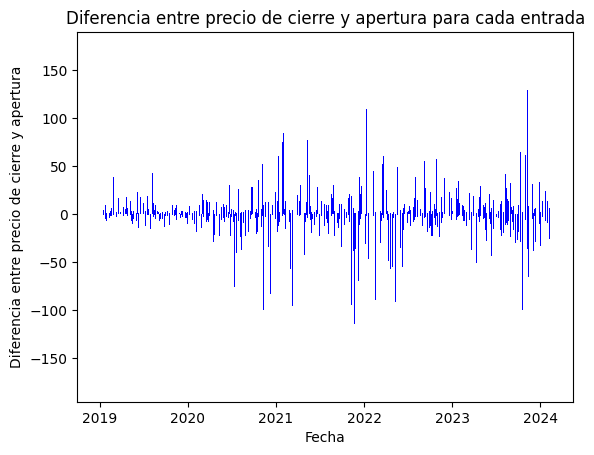

In [35]:
df_data['Diferencia'] = df_data['Close'] - df_data['Open']


plt.bar(df_data['Date'], df_data['Diferencia'], color='blue')

plt.xlabel('Fecha')
plt.ylabel('Diferencia entre precio de cierre y apertura')
plt.title('Diferencia entre precio de cierre y apertura para cada entrada')

plt.show()

Modelos de predicción:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
df_data

,Date,Company,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Diferencia
0,2019-01-02,NFLX,259.28,269.75,256.58,267.66,267.66,11679500,2019,1,2,8.38
1,2019-01-03,NFLX,270.20,275.79,264.43,271.20,271.20,14969600,2019,1,3,1.00
2,2019-01-04,NFLX,281.88,297.80,278.54,297.57,297.57,19330100,2019,1,4,15.69
3,2019-01-07,NFLX,302.10,316.80,301.65,315.34,315.34,18620100,2019,1,7,13.24
4,2019-01-08,NFLX,319.98,320.59,308.01,320.27,320.27,15359200,2019,1,8,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...
16696,2024-02-07,MCD,285.05,290.53,284.11,287.33,287.33,3954700,2024,2,7,2.28
16697,2024-02-08,MCD,286.20,293.15,284.20,291.93,291.93,4605000,2024,2,8,5.73
16698,2024-02-09,MCD,292.15,292.51,288.92,289.47,289.47,3322100,2024,2,9,-2.68
16699,2024-02-12,MCD,289.00,291.19,288.76,289.44,289.44,2392300,2024,2,12,0.44


Este código entrena un modelo de regresión lineal para predecir la diferencia entre el precio de apertura y cierre (Diferencia) utilizando las características del DataFrame.

In [38]:
X = df_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]  # características
y = df_data['Diferencia']  # variable objetivo


In [39]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 9.442832865464193e-25
